## Ambitionbox
## https://www.ambitionbox.com/list-of-companies?page=2

### The goal of this project is to extract company information like (name, rating, pros, cons, description) from Ambition box


In [3]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [2]:
url= 'https://www.ambitionbox.com/list-of-companies?page=1'

In [4]:
agent = {"User-Agent":'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML, like Gecko) Chrome/80.0.3987.162 Safari/537.36'}

In [5]:
webpage= requests.get(url, headers= agent)

'<!doctype html>\n<html data-n-head-ssr lang="en" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D">\n  <head >\n    <meta charset="UTF-8">\n    <meta name="viewport" content="width=device-width,initial-scale=1,minimum-scale=1">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge"> \n    <style>@media only screen and (min-width:767px){.trp-img{width:400px!important;max-width:400px!important}}#ab-body{pointer-events:none}</style>\n    <script>window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date)</script>\n\n    <title>List of companies in India | AmbitionBox</title><meta data-n-head="ssr" name="copyright" content="2024 AmbitionBox"><meta data-n-head="ssr" name="revisit-after" content="1 day"><meta data-n-head="ssr" name="application-name" content="AmbitionBox"><meta data-n-head="ssr" name="content-language" content="EN"><meta data-n-head="ssr" name="google-signin-client_id" content="462822053404-hphug4p
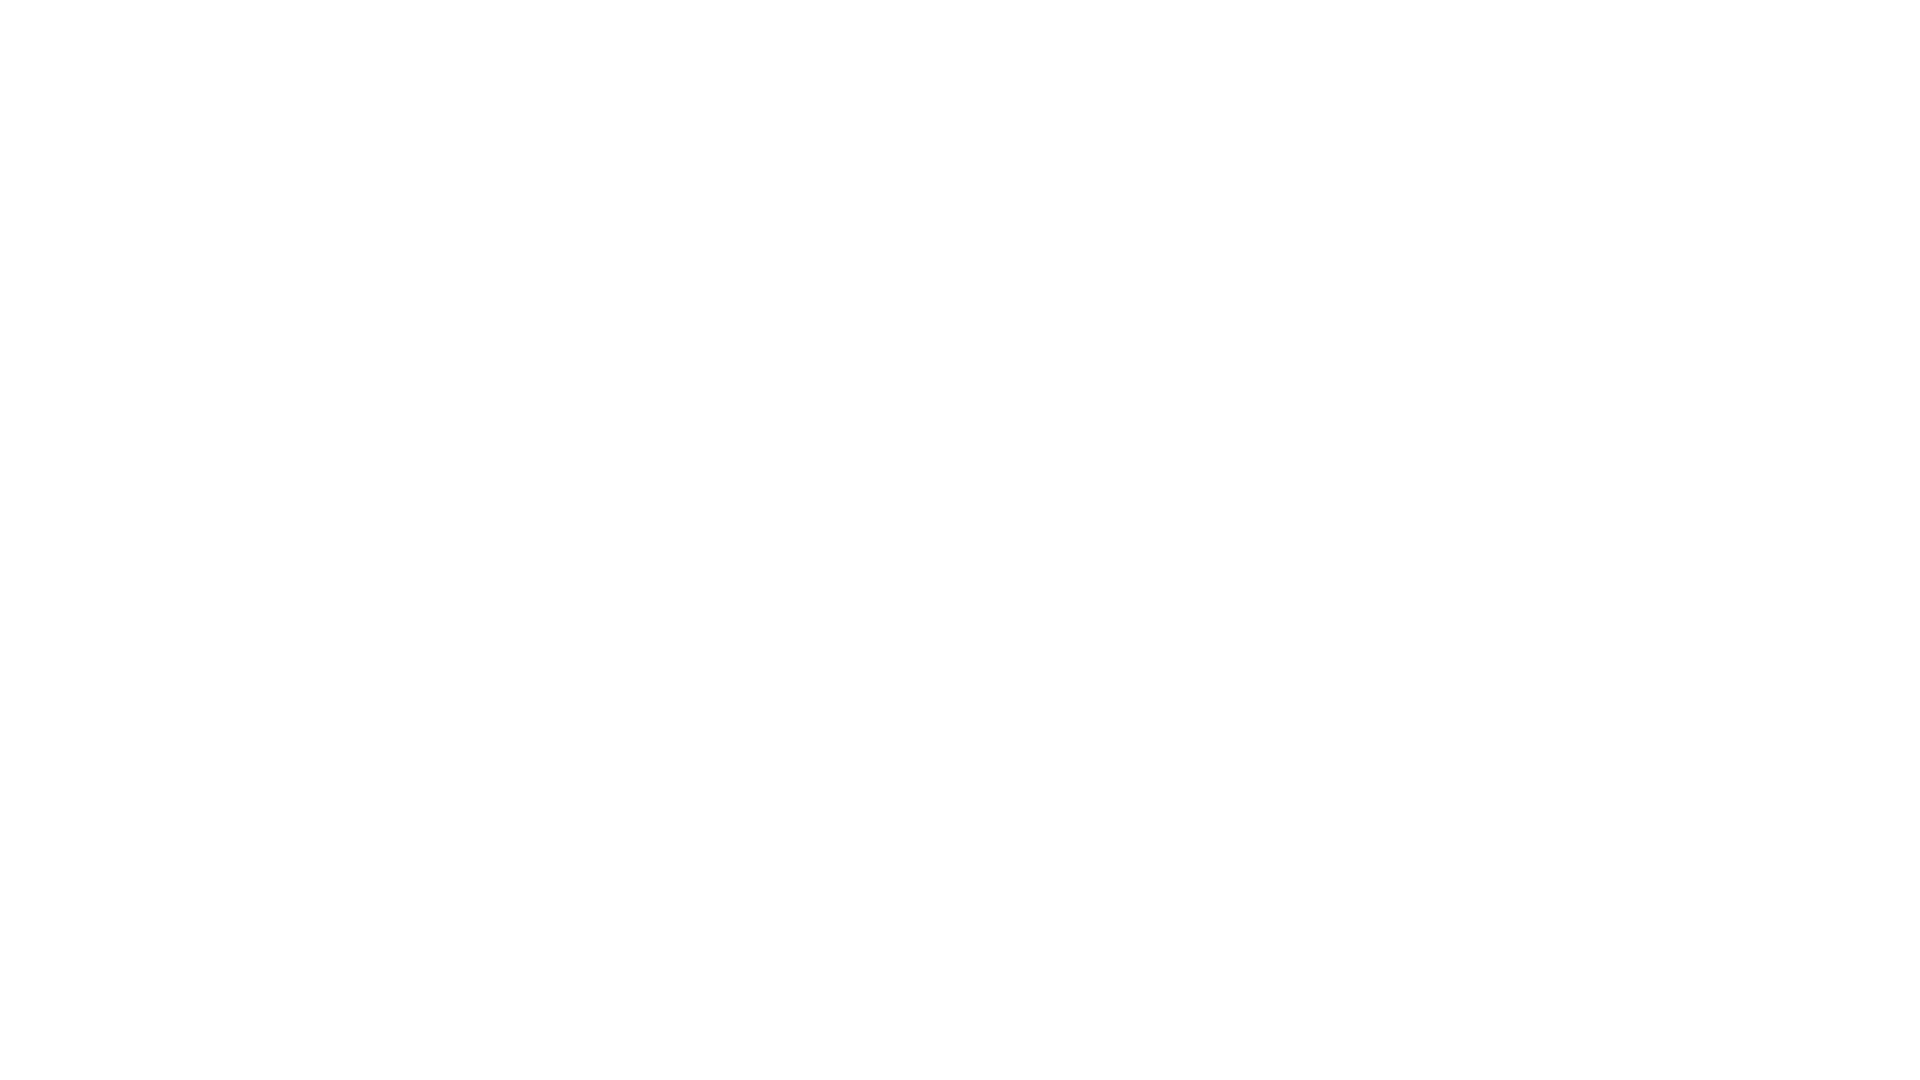
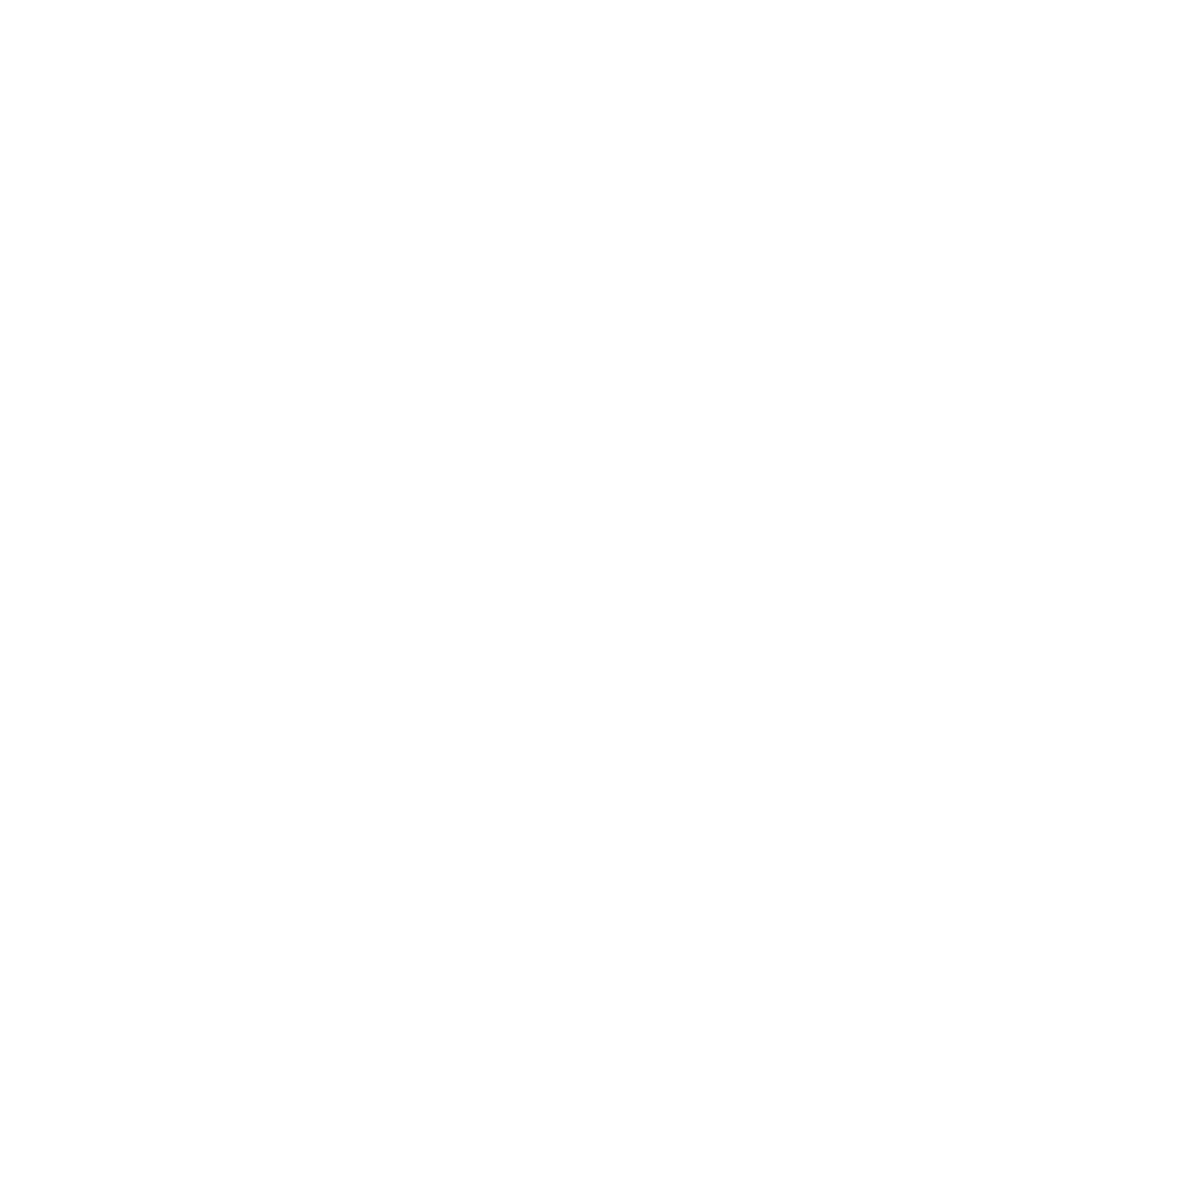

In [6]:
webpage.text

<!DOCTYPE html>

<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<style>@media only screen and (min-width:767px){.trp-img{width:400px!important;max-width:400px!important}}#ab-body{pointer-events:none}</style>
<script>window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date)</script>
<title>List of companies in India | AmbitionBox</title><meta content="2024 AmbitionBox" data-n-head="ssr" name="copyright"/><meta content="1 day" data-n-head="ssr" name="revisit-after"/><meta content="AmbitionBox" data-n-head="ssr" name="application-name"/><meta content="EN" data-n-head="ssr" name="content-language"/><meta content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com" data-n-head="ssr" name=
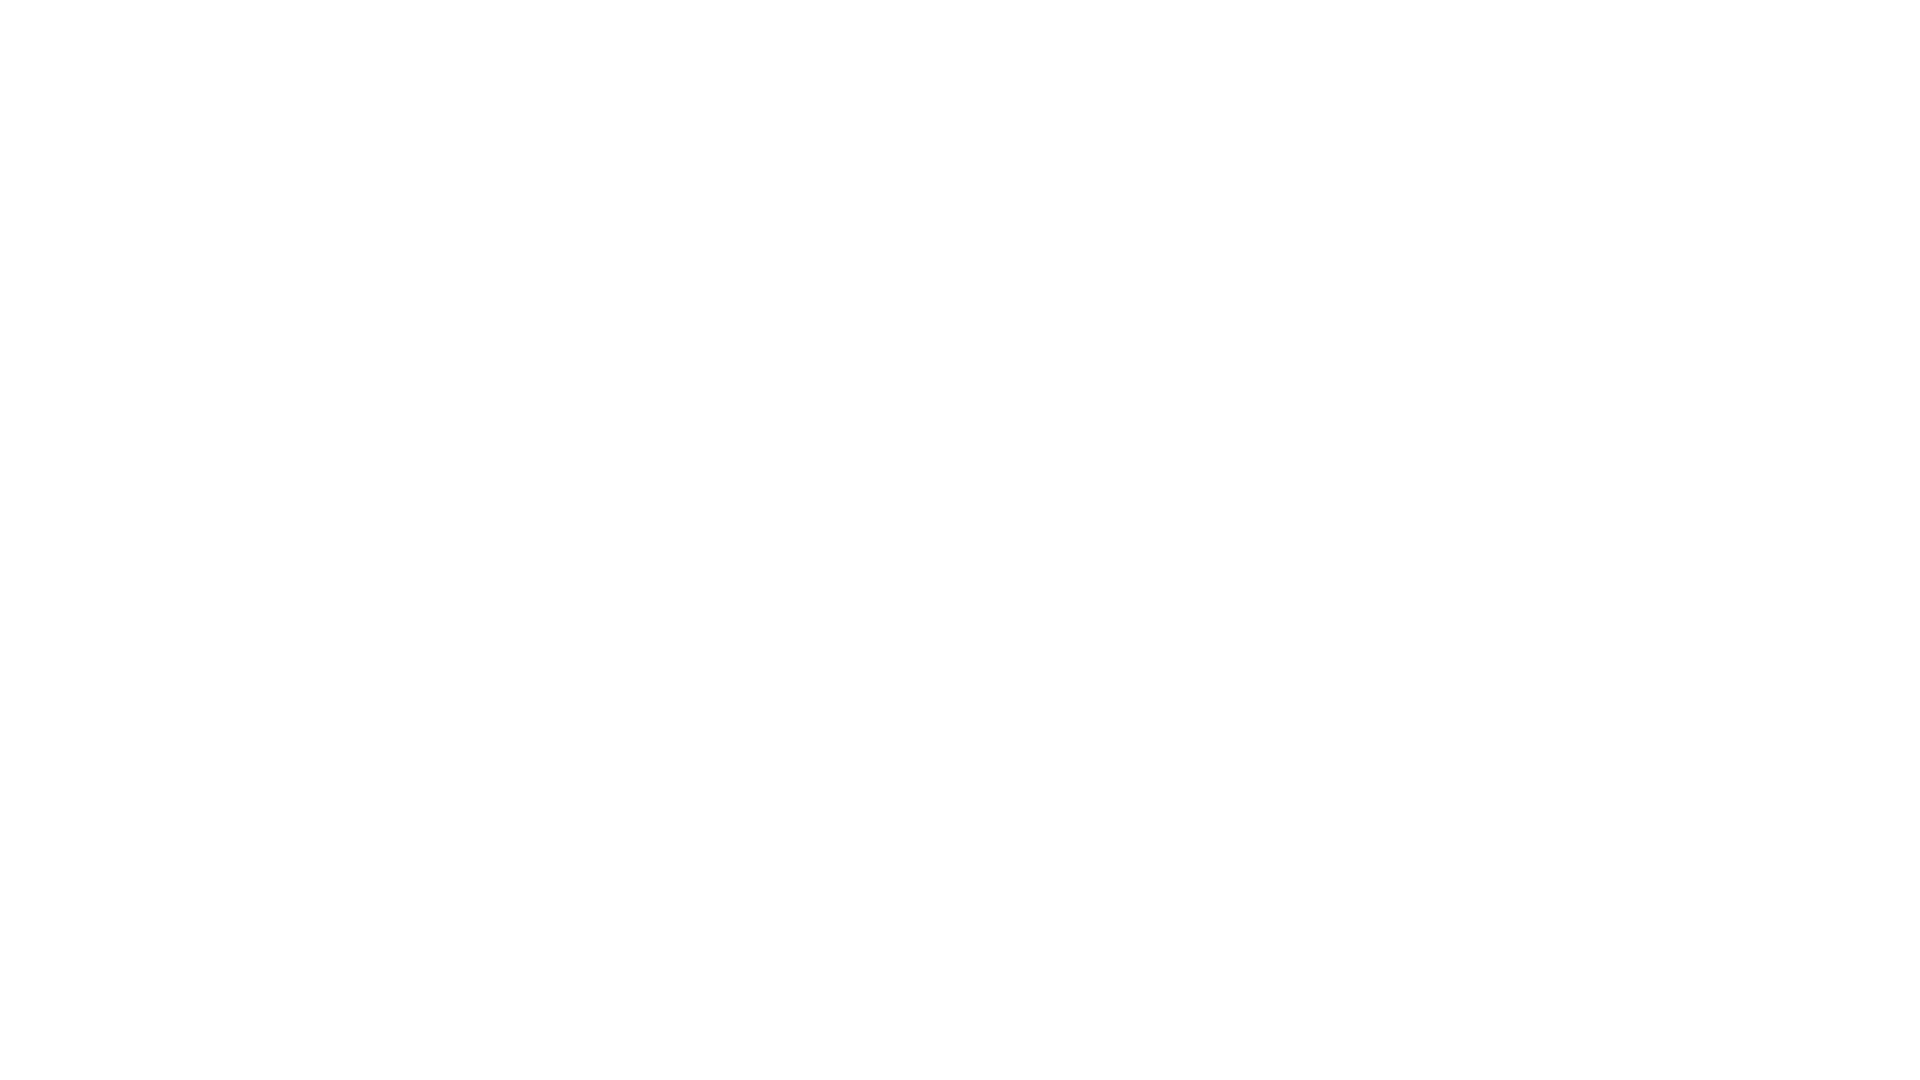
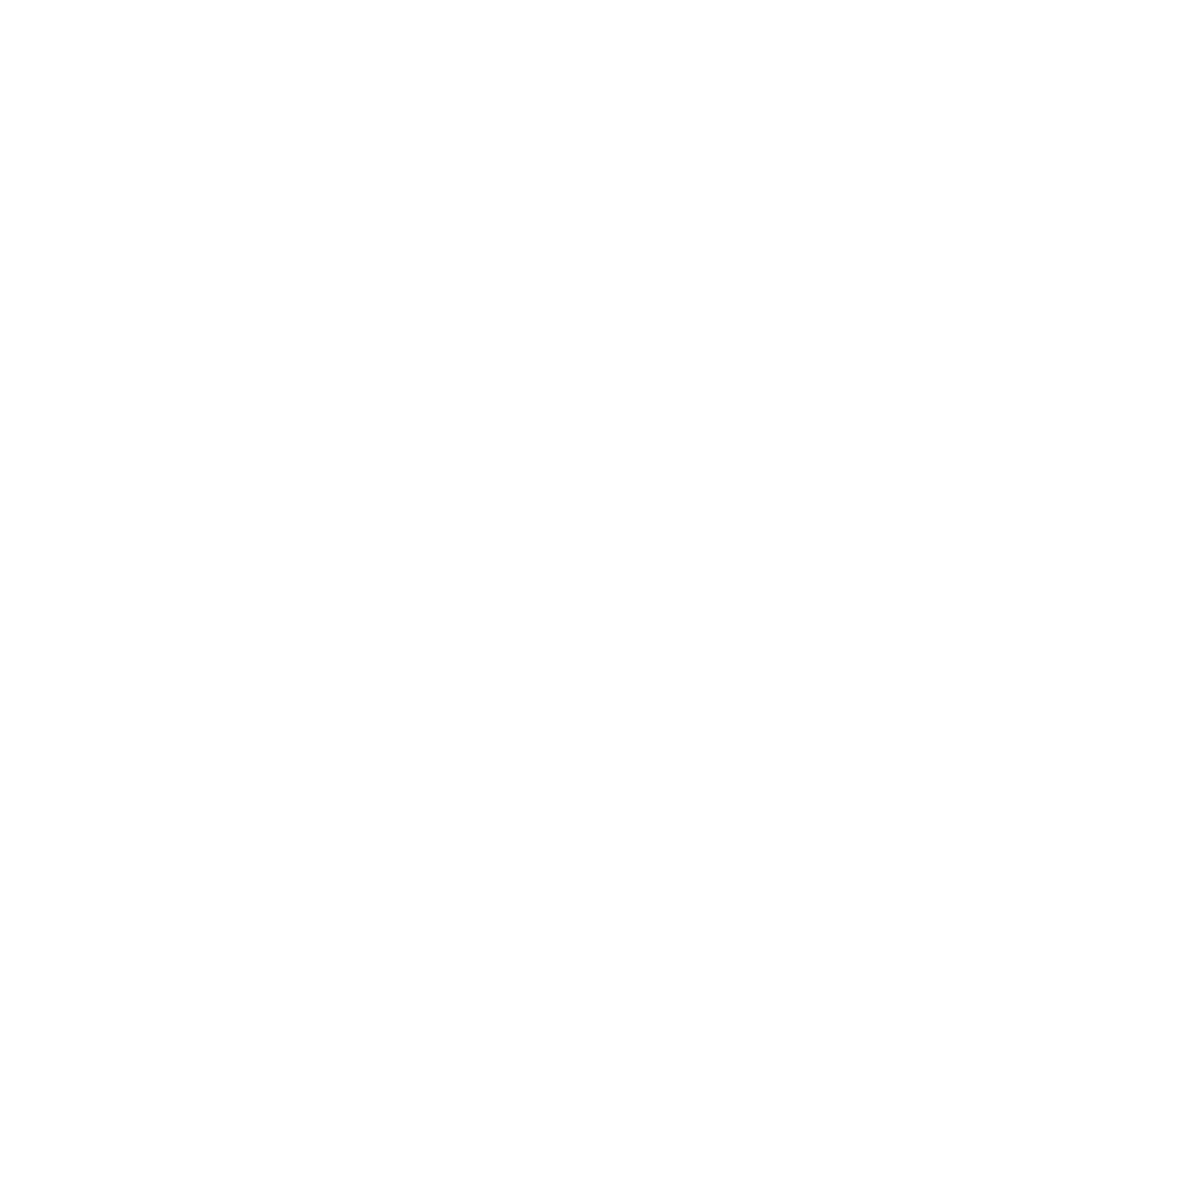

In [7]:
soup= BeautifulSoup(webpage.content, 'html')
soup

In [28]:
# for company_name in soup.findAll('h2',{'class':'companyCardWrapper__companyName'}):
#     print(company_name.text.strip())

In [27]:
# for company_name in soup.findAll('span',{'class':'companyCardWrapper__companyRatingValue'}):
#     print(company_name.text.strip())

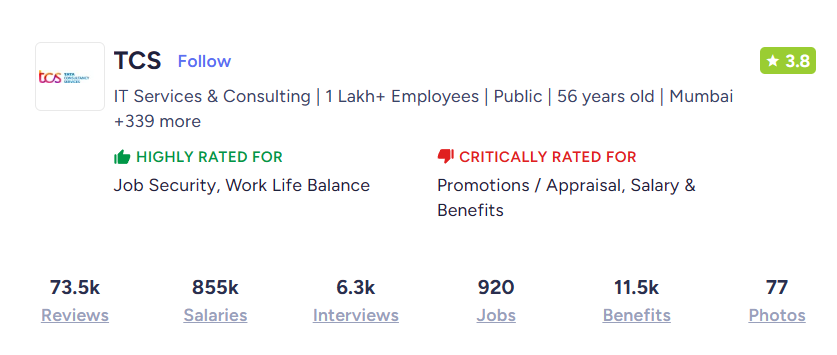

In [118]:
def fetch_and_return(page_url):
    agent = {"User-Agent":'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML, like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
    webpage= requests.get(page_url, headers= agent)
    
    soup= BeautifulSoup(webpage.content, 'html')   
    companies= soup.findAll('div', class_='companyCardWrapper')

    name= [company.find('h2').text.strip() for company in companies]
    rating= [company.find('span', class_= 'companyCardWrapper__companyRatingValue').text.strip() for company in companies]
    desc= [company.find('span', class_= 'companyCardWrapper__interLinking').text.strip() for company in companies]
    # company_type= [c_type[0] for c_type in desc]
    
    critically_rated=[]
    for comp in companies:
        reviews= comp.findAll('div', class_='companyCardWrapper__ratingHeader')
        # print(len(reviews))
        if len(reviews)>0 and 'Critically Rated For' in reviews[0].text.strip():
            critically_rated.append(comp.findAll('span', class_= 'companyCardWrapper__ratingValues')[0].text.strip())
        elif len(reviews)>1 and 'Critically Rated For' in reviews[1].text.strip():
            critically_rated.append(comp.findAll('span', class_= 'companyCardWrapper__ratingValues')[1].text.strip())
        else:
            critically_rated.append('--')

    highly_rated= []
    for comp in companies:
        reviews= comp.findAll('div', class_='companyCardWrapper__ratingHeader')
        # print(len(reviews))
        if len(reviews)>0 and 'Highly Rated For' in reviews[0].text.strip():
            highly_rated.append(comp.findAll('span', class_= 'companyCardWrapper__ratingValues')[0].text.strip())
        elif len(reviews)>1 and 'Highly Rated For' in reviews[1].text.strip():
            highly_rated.append(comp.findAll('span', class_= 'companyCardWrapper__ratingValues')[1].text.strip())
        else:
            highly_rated.append('--')
    
    
    return {'company_name':name, 'rating': rating, 'description': desc, 'highly rated for': highly_rated, 'critically rated for':critically_rated}


In [99]:
data= {'company_name':[], 'rating': [], 'description':[],  'highly rated for': [], 'critically rated for':[]}
final_df= pd.DataFrame(data)
for i in range(1, 50):
    url = f'https://www.ambitionbox.com/list-of-companies?page={i}'
    data= fetch_and_return(url)
    current_df= pd.DataFrame(data)
    final_df= pd.concat([final_df, current_df], axis=0, ignore_index= True)

final_df

,company_name,rating,description,highly rated for,critically rated for
0,TCS,3.8,IT Services & Consulting | 1 Lakh+ Employees |...,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits"
1,Accenture,4.0,IT Services & Consulting | 1 Lakh+ Employees |...,"Company Culture, Skill Development / Learning,...",--
2,Cognizant,3.9,IT Services & Consulting | 1 Lakh+ Employees |...,Skill Development / Learning,Promotions / Appraisal
3,Wipro,3.8,IT Services & Consulting | 1 Lakh+ Employees |...,Job Security,"Promotions / Appraisal, Salary & Benefits"
4,Capgemini,3.9,IT Services & Consulting | 1 Lakh+ Employees |...,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits"
...,...,...,...,...,...
975,HFCL,4.2,Hardware & Networking | 1k-5k Employees | Publ...,"Work Life Balance, Job Security, Skill Develop...",--
976,INDO-MIM,4.3,Industrial Machinery | 1k-5k Employees | 26 ye...,"Job Security, Work Life Balance, Skill Develop...",--
977,Teva Pharmaceuticals,4.2,Pharma | 1k-5k Employees | Forbes Global 2000 ...,"Work Life Balance, Company Culture, Job Security",--
978,Fluor Corporation,4.3,Forbes Global 2000 | Gurgaon / Gurugram +22 more,"Work Life Balance, Company Culture, Salary & B...",Job Security


In [100]:
final_df.shape

(980, 5)

In [101]:
final_df.to_csv('ambition_box.csv')

In [105]:
final_df['rating']= final_df['rating'].astype('float')

In [107]:
final_df[final_df['rating']>=4.5]['company_name'].count()

34

In [111]:
final_df[final_df['company_name']== 'Infosys']

,company_name,rating,description,highly rated for,critically rated for
7,Infosys,3.8,IT Services & Consulting | 1 Lakh+ Employees |...,"Job Security, Company Culture, Skill Developme...","Salary & Benefits, Promotions / Appraisal"


In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='rating', ylabel='Count'>

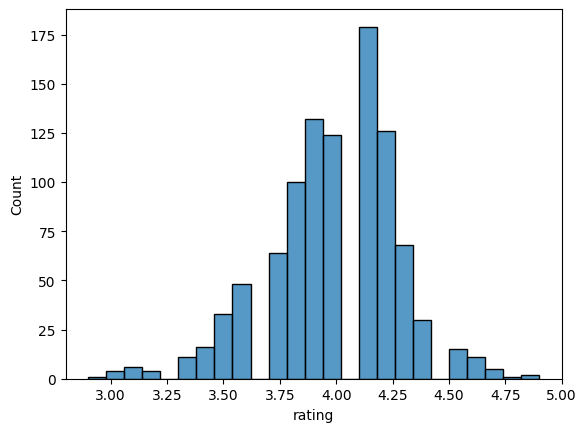

In [113]:
sns.histplot(final_df['rating'])

### code for automatically fetching all pages and stoping when data is no more available
modify i= 1 to run from begining

In [121]:
data= {'company_name':[], 'rating': [], 'description':[],  'highly rated for': [], 'critically rated for':[]}
fi_df= pd.DataFrame(data)

# MODIFY (1 to all possible pages it will fetch)
i=499
while(True):
    url = f'https://www.ambitionbox.com/list-of-companies?page={i}'
    data= fetch_and_return(url)
    if len(data['company_name'])==0:
        break
    i+=1
    current_df= pd.DataFrame(data)
    fi_df= pd.concat([fi_df, current_df], axis=0, ignore_index= True)

fi_df

,company_name,rating,description,highly rated for,critically rated for
0,Seth Anandram Jaipuria School,3.9,Education & Training | 51-200 Employees | 79 y...,Skill Development / Learning,"Promotions / Appraisal, Company Culture, Salar..."
1,Gsrtc,4.4,Urban Transport | 201-500 Employees | Public |...,"Skill Development / Learning, Work Satisfactio...",--
2,Kotak Education Foundation,3.3,Non-Profit | 201-500 Employees | 17 years old ...,--,"Promotions / Appraisal, Company Culture, Work ..."
3,Thakral Services India,3.5,Law Enforcement & Security | 501-1k Employees ...,--,"Promotions / Appraisal, Salary & Benefits, Wor..."
4,Planet EDU,3.4,EdTech | 51-200 Employees | 23 years old | Gur...,--,"Promotions / Appraisal, Job Security, Skill De..."
5,Ampcus,3.4,IT Services & Consulting | 51-200 Employees | ...,--,"Promotions / Appraisal, Work Life Balance, Job..."
6,D-VoiS Communications,3.8,Telecom | 51-200 Employees | 18 years old | Be...,--,"Promotions / Appraisal, Salary & Benefits"
7,Paramount Surgimed,4.3,Medical Equipment | 201-500 Employees | 31 yea...,"Skill Development / Learning, Company Culture,...",--
8,Terminal Technologies (i),4.3,Telecom | 201-500 Employees | 31 years old | V...,"Skill Development / Learning, Job Security, Wo...",--
9,Kamdhenu Paints,3.8,Building Material | 201-500 Employees (Global)...,Work Life Balance,"Promotions / Appraisal, Job Security, Salary &..."
